In [20]:
# basic + dates
import numpy as np
import pandas as pd
from util import *
import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
parse_dates = [['Date', 'Time']]
filename = r"Data\household_power_consumption.txt"
encode_cols = ['Month', 'DayofWeek', 'Hour']
bucket_size = "60T"


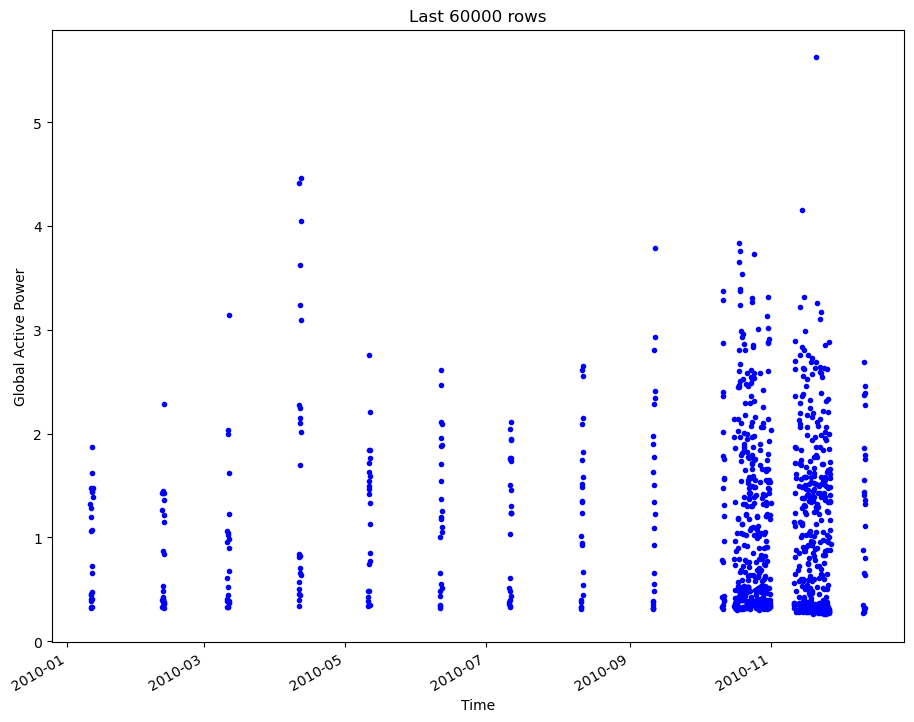

In [22]:

# (1)  data is not datetime ordered. It is random
N_rows = 60000
df = preprocess(N_rows, parse_dates, filename)
G_power = df["Global_active_power"]
# G_power_sort=G_power.sort_values('index')

df = pd.DataFrame(bucket_avg(G_power, bucket_size))
df.dropna(inplace=True)
df.Global_active_power.plot(style='b.')
plt.ylabel('Global Active Power')
plt.xlabel('Time')
plt.title("Last 60000 rows")
plt.savefig('Outputs\EDA_2010.png', dpi=300)
plt.show()


### (2)So we focus on the 2010-11 area which is around the last 19000 data rows

(18999,)


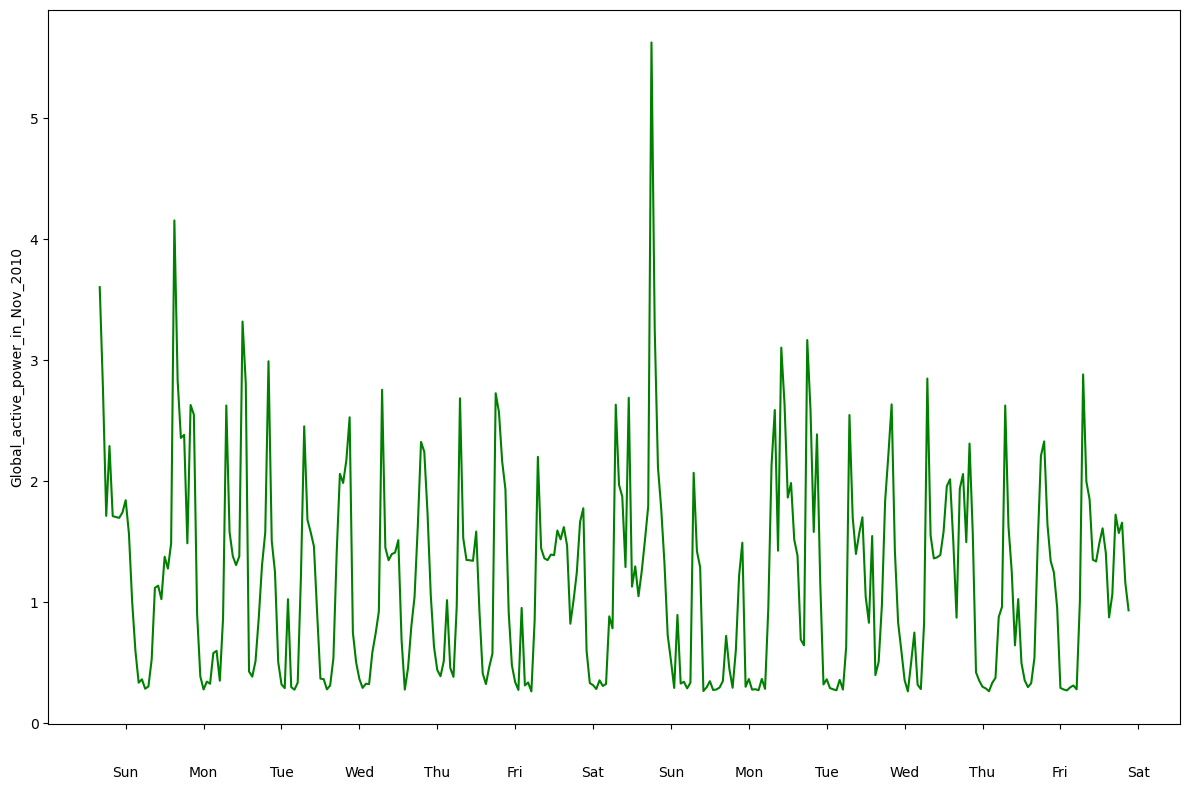

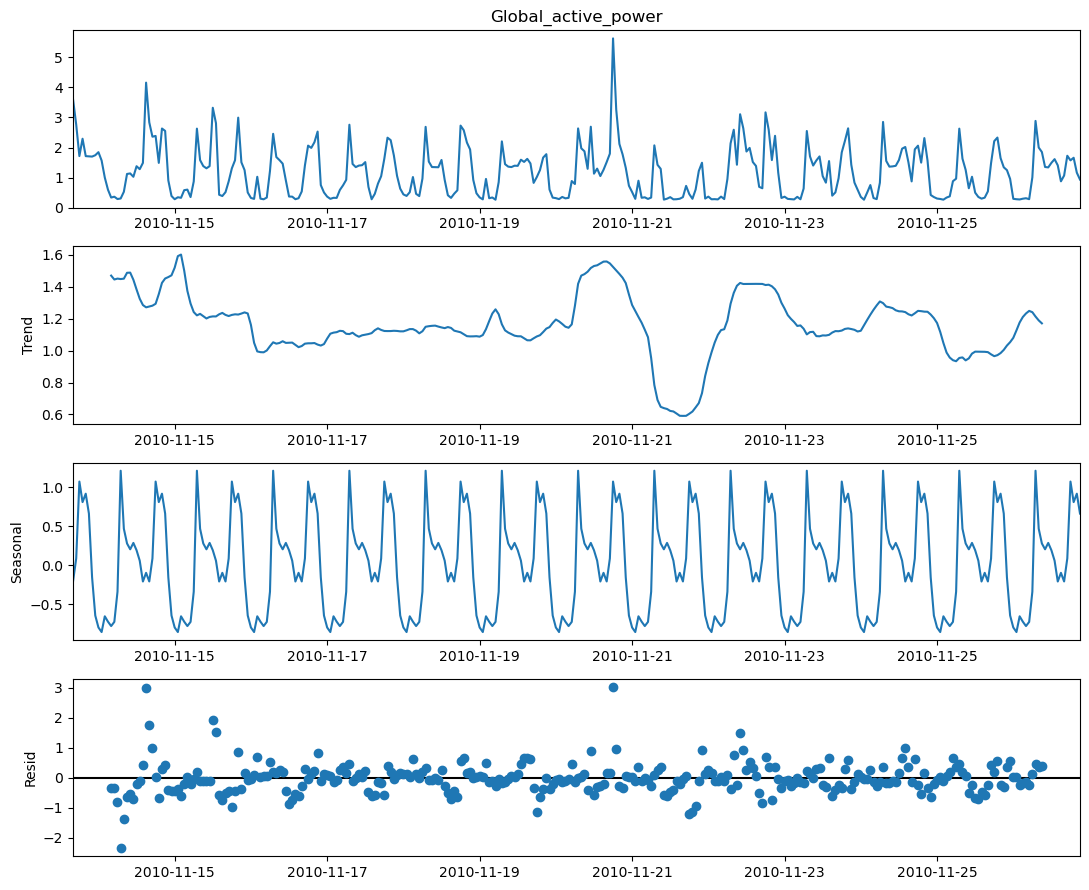

In [27]:

import statsmodels.api as sm
from pylab import rcParams
N_rows = 19000
df = preprocess(N_rows, parse_dates, filename)
G_power = df["Global_active_power"]
print(G_power.shape)  # 21661 rows
df_G = pd.DataFrame(bucket_avg(G_power, bucket_size))
df_G.dropna(inplace=True)

# time series plot
ts_label = 'Global_active_power_in_Nov_2010'
timeseries_plot(df_G.Global_active_power, 'g', ts_label)


# component plot
rcParams['figure.figsize'] = 11, 9
decomposition = sm.tsa.seasonal_decompose(
    df_G.Global_active_power, model='additive')
fig = decomposition.plot()
plt.tight_layout()
plt.savefig('Outputs\\ts_decomposition_plot.png', dpi=300)
plt.show()


                     Global_active_power Time of Day        Date
Date_Time                                                       
2010-11-13 16:00:00             3.605278    16:00:00  2010-11-13
2010-11-13 17:00:00             2.761567    17:00:00  2010-11-13
2010-11-13 18:00:00             1.715300    18:00:00  2010-11-13
2010-11-13 19:00:00             2.292333    19:00:00  2010-11-13
2010-11-13 20:00:00             1.713167    20:00:00  2010-11-13


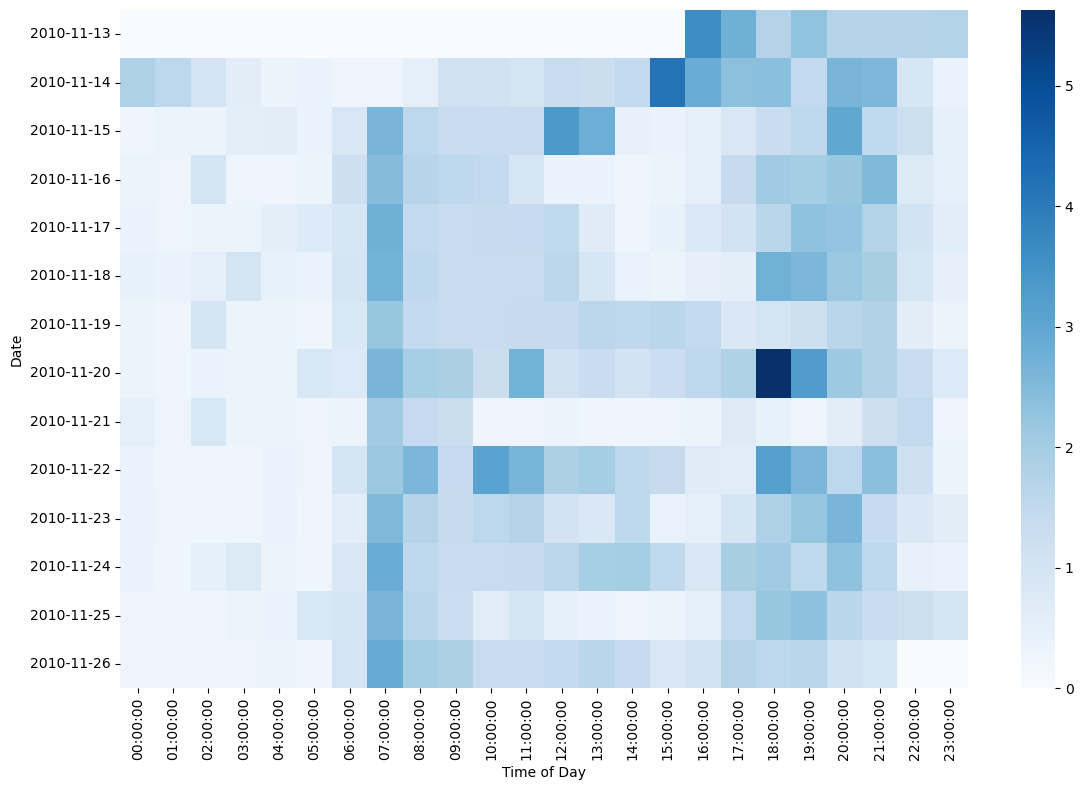

In [24]:

# heatmap
df_G['Time of Day'] = df_G.index.time
df_G['Date'] = df_G.index.date
print(df_G.head())
dfG_pivot = df_G.pivot_table(
    index="Date", columns="Time of Day", values='Global_active_power', fill_value=0)
dfG_pivot.head()
plt.figure(figsize=(12, 8))
sns.heatmap(dfG_pivot, cmap='Blues')
plt.tight_layout()
plt.savefig('Outputs\date_time_power_heatmap.png', dpi=300)
plt.show()


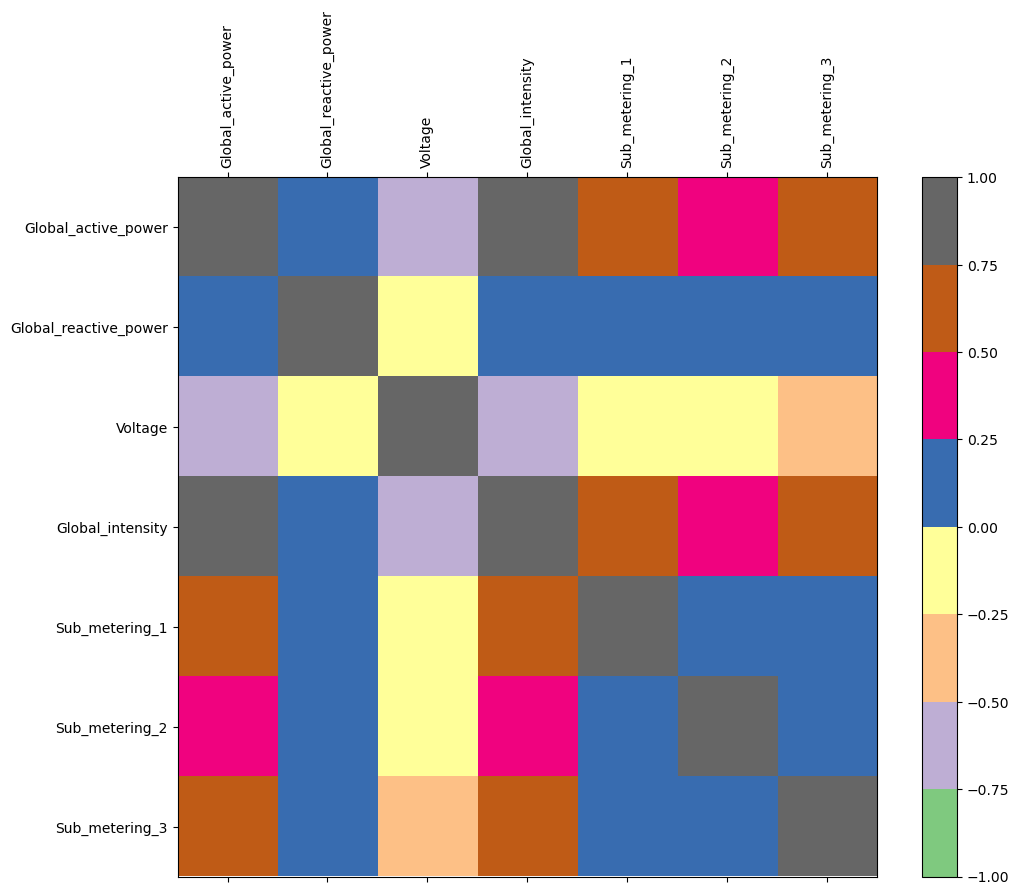

In [25]:

# correlation plot
names = df.columns
correlations = df.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1, cmap='Accent')
fig.colorbar(cax)
ticks = np.arange(0, 7, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names, rotation=90)
ax.set_yticklabels(names)
# plt.figure(figsize=(8,8))
plt.tight_layout()
plt.savefig('Outputs\correlation.png', dpi=300)
plt.show()
